In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('labelled-balanced-data11.csv')

In [3]:
df.head()

,Region,Age,Gender,BMI,Waist_Size,Physical_Activity,Diet,BP,Family_History,Smoking,Class
0,10,2,1,1,2,1,1,0,1,1,0
1,8,1,1,1,2,0,1,1,0,1,0
2,8,3,0,0,1,0,0,1,1,1,1
3,2,0,1,2,2,0,1,1,2,1,0
4,7,0,0,1,2,0,1,0,2,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Region             7806 non-null   int64
 1   Age                7806 non-null   int64
 2   Gender             7806 non-null   int64
 3   BMI                7806 non-null   int64
 4   Waist_Size         7806 non-null   int64
 5   Physical_Activity  7806 non-null   int64
 6   Diet               7806 non-null   int64
 7   BP                 7806 non-null   int64
 8   Family_History     7806 non-null   int64
 9   Smoking            7806 non-null   int64
 10  Class              7806 non-null   int64
dtypes: int64(11)
memory usage: 671.0 KB


In [5]:
df['Class'].value_counts()

Class
0    3906
1    3900
Name: count, dtype: int64

In [6]:
x_rfe_NZOA = df[['Age', 'Smoking']]
x_rfe_ZOA = df[['BP', 'Age']]
x_rf_NZOA = df[['BMI', 'Physical_Activity']]
x_rf_ZOA = df[['Age', 'BMI','Family_History']]

In [7]:
y=df['Class']

In [9]:
from sklearn.model_selection import train_test_split

# Assuming you have already defined x_rfe_NZOA, x_rfe_ZOA, x_rf_NZOA, x_rf_ZOA, and y as mentioned in your question

# Splitting the data into training and testing sets for each subset
x_rfe_NZOA_train, x_rfe_NZOA_test, y_train, y_test = train_test_split(x_rfe_NZOA, y, test_size=0.3, random_state=42)
x_rfe_ZOA_train, x_rfe_ZOA_test, y_train, y_test = train_test_split(x_rfe_ZOA, y, test_size=0.3, random_state=42)
x_rf_NZOA_train, x_rf_NZOA_test, y_train, y_test = train_test_split(x_rf_NZOA, y, test_size=0.3, random_state=42)
x_rf_ZOA_train, x_rf_ZOA_test, y_train, y_test = train_test_split(x_rf_ZOA, y, test_size=0.3, random_state=42)

# Note: You may want to adjust the test_size and random_state parameters based on your specific requirements.


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split the data into training and testing sets as mentioned before

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the models
rf_classifier.fit(x_rfe_NZOA_train, y_train)
y_pred_rfe_NZOA = rf_classifier.predict(x_rfe_NZOA_test)

rf_classifier.fit(x_rfe_ZOA_train, y_train)
y_pred_rfe_ZOA = rf_classifier.predict(x_rfe_ZOA_test)

rf_classifier.fit(x_rf_NZOA_train, y_train)
y_pred_rf_NZOA = rf_classifier.predict(x_rf_NZOA_test)

rf_classifier.fit(x_rf_ZOA_train, y_train)
y_pred_rf_ZOA = rf_classifier.predict(x_rf_ZOA_test)

# Evaluate the performance of each model
accuracy_rfe_NZOA = accuracy_score(y_test, y_pred_rfe_NZOA)
accuracy_rfe_ZOA = accuracy_score(y_test, y_pred_rfe_ZOA)
accuracy_rf_NZOA = accuracy_score(y_test, y_pred_rf_NZOA)
accuracy_rf_ZOA = accuracy_score(y_test, y_pred_rf_ZOA)

# Print the accuracy for each model
print(f'Accuracy for x_rfe_NZOA: {accuracy_rfe_NZOA:.2f}')
print(f'Accuracy for x_rfe_ZOA: {accuracy_rfe_ZOA:.2f}')
print(f'Accuracy for x_rf_NZOA: {accuracy_rf_NZOA:.2f}')
print(f'Accuracy for x_rf_ZOA: {accuracy_rf_ZOA:.2f}')


Accuracy for x_rfe_NZOA: 0.80
Accuracy for x_rfe_ZOA: 0.56
Accuracy for x_rf_NZOA: 0.58
Accuracy for x_rf_ZOA: 0.52


In [ ]:
# # Calculate SHAP values for the entire x_test dataset
# shap_values = explainer.shap_values(x_rfe_ZOA_test)

# # Visualize the SHAP values using a summary plot
# shap.summary_plot(shap_values, x_rfe_ZOA_test, feature_names=x_rfe_ZOA_test.columns)

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have already calculated accuracy values as mentioned before

# # Model names
# models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']

# # Accuracy values
# accuracies = [accuracy_rfe_NZOA, accuracy_rfe_ZOA, accuracy_rf_NZOA, accuracy_rf_ZOA]

# # Plotting
# plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
# plt.ylim(0, 1)  # Set the y-axis limit between 0 and 1 for accuracy values
# plt.ylabel('Accuracy')
# plt.title('Random Forest Classifier Accuracy for Different Feature Subsets')
# plt.show()


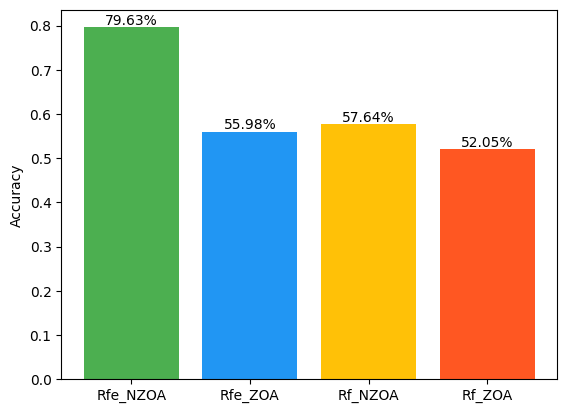

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already calculated accuracy values as mentioned before

# Model names
models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']

# Accuracy values
accuracies = [accuracy_rfe_NZOA, accuracy_rfe_ZOA, accuracy_rf_NZOA, accuracy_rf_ZOA]

# Choose eye-soothing colors
colors = ['#4CAF50', '#2196F3', '#FFC107', '#FF5722']

# Plotting
fig, ax = plt.subplots()
bars = plt.bar(models, accuracies, color=colors)

# Annotate bars with percentage values
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval*100:.2f}%', ha='center', va='bottom')

plt.ylabel('Accuracy')
# plt.savefig("Accuracy of models v2.png")
plt.show()


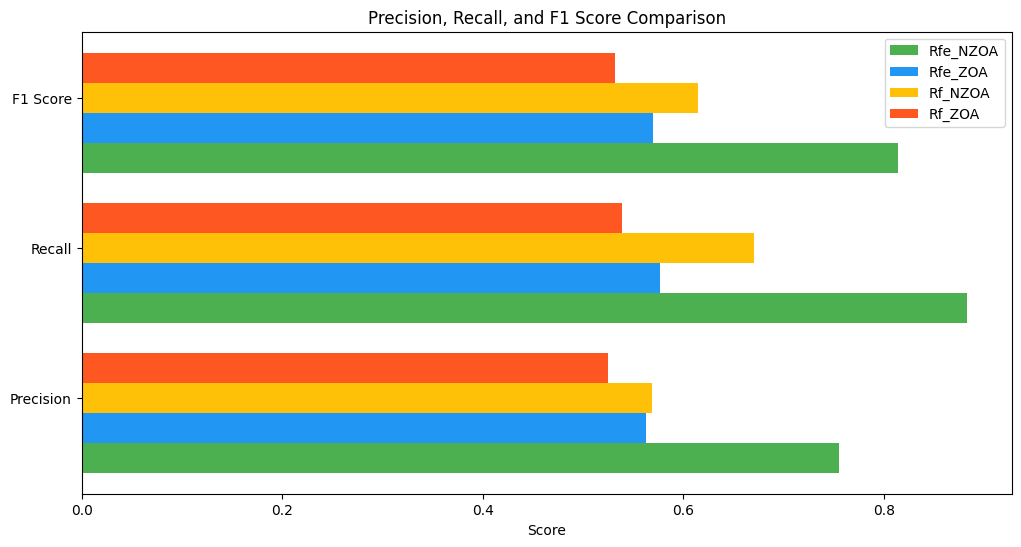

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision, recall, and F1 score for each model
precision_rfe_NZOA = precision_score(y_test, y_pred_rfe_NZOA)
recall_rfe_NZOA = recall_score(y_test, y_pred_rfe_NZOA)
f1_rfe_NZOA = f1_score(y_test, y_pred_rfe_NZOA)

precision_rfe_ZOA = precision_score(y_test, y_pred_rfe_ZOA)
recall_rfe_ZOA = recall_score(y_test, y_pred_rfe_ZOA)
f1_rfe_ZOA = f1_score(y_test, y_pred_rfe_ZOA)

precision_rf_NZOA = precision_score(y_test, y_pred_rf_NZOA)
recall_rf_NZOA = recall_score(y_test, y_pred_rf_NZOA)
f1_rf_NZOA = f1_score(y_test, y_pred_rf_NZOA)

precision_rf_ZOA = precision_score(y_test, y_pred_rf_ZOA)
recall_rf_ZOA = recall_score(y_test, y_pred_rf_ZOA)
f1_rf_ZOA = f1_score(y_test, y_pred_rf_ZOA)

# Data for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
values_rfe_NZOA = [precision_rfe_NZOA, recall_rfe_NZOA, f1_rfe_NZOA]
values_rfe_ZOA = [precision_rfe_ZOA, recall_rfe_ZOA, f1_rfe_ZOA]
values_rf_NZOA = [precision_rf_NZOA, recall_rf_NZOA, f1_rf_NZOA]
values_rf_ZOA = [precision_rf_ZOA, recall_rf_ZOA, f1_rf_ZOA]

# Bar width
bar_width = 0.2
index = np.arange(len(metrics))

# Plotting
plt.figure(figsize=(12, 6))

plt.barh(index - bar_width, values_rfe_NZOA, bar_width, label='Rfe_NZOA', color='#4CAF50')
plt.barh(index, values_rfe_ZOA, bar_width, label='Rfe_ZOA', color='#2196F3')
plt.barh(index + bar_width, values_rf_NZOA, bar_width, label='Rf_NZOA', color='#FFC107')
plt.barh(index + 2 * bar_width, values_rf_ZOA, bar_width, label='Rf_ZOA', color='#FF5722')

plt.xlabel('Score')
plt.title('Precision, Recall, and F1 Score Comparison')
plt.yticks(index + bar_width, metrics)
plt.legend()
plt.show()


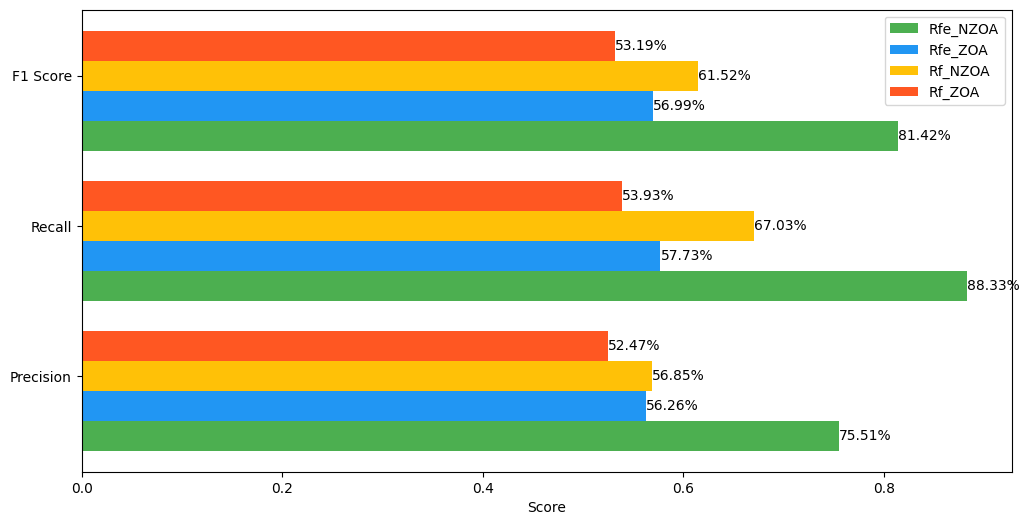

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# ... (previous code remains unchanged)

# Data for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
values_rfe_NZOA = [precision_rfe_NZOA, recall_rfe_NZOA, f1_rfe_NZOA]
values_rfe_ZOA = [precision_rfe_ZOA, recall_rfe_ZOA, f1_rfe_ZOA]
values_rf_NZOA = [precision_rf_NZOA, recall_rf_NZOA, f1_rf_NZOA]
values_rf_ZOA = [precision_rf_ZOA, recall_rf_ZOA, f1_rf_ZOA]

# Bar width
bar_width = 0.2
index = np.arange(len(metrics))

# Plotting
plt.figure(figsize=(12, 6))

plt.barh(index - bar_width, values_rfe_NZOA, bar_width, label='Rfe_NZOA', color='#4CAF50')
plt.barh(index, values_rfe_ZOA, bar_width, label='Rfe_ZOA', color='#2196F3')
plt.barh(index + bar_width, values_rf_NZOA, bar_width, label='Rf_NZOA', color='#FFC107')
plt.barh(index + 2 * bar_width, values_rf_ZOA, bar_width, label='Rf_ZOA', color='#FF5722')

# Annotate bars with values
for i, value in enumerate(values_rfe_NZOA):
    plt.text(value, index[i] - bar_width, f'{value*100:.2f}%', ha='left', va='center', color='black')

for i, value in enumerate(values_rfe_ZOA):
    plt.text(value, index[i], f'{value*100:.2f}%', ha='left', va='center', color='black')

for i, value in enumerate(values_rf_NZOA):
    plt.text(value, index[i] + bar_width, f'{value*100:.2f}%', ha='left', va='center', color='black')

for i, value in enumerate(values_rf_ZOA):
    plt.text(value, index[i] + 2 * bar_width, f'{value*100:.2f}%', ha='left', va='center', color='black')

plt.xlabel('Score')
# plt.title('Precision, Recall, and F1 Score Comparison')
plt.yticks(index + bar_width, metrics)
plt.legend()
# plt.savefig("metrics of models v2.png")
plt.show()


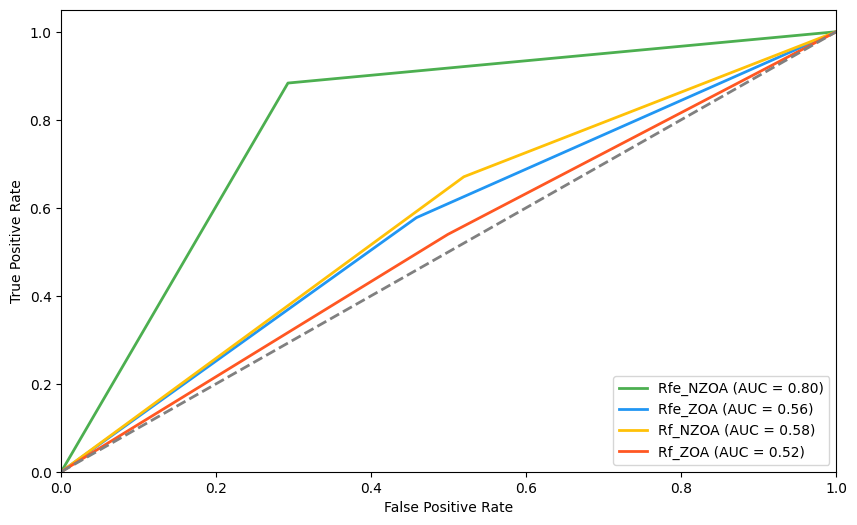

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming you have already trained the models and have the predictions

# Convert target variable to binary form for ROC curve
y_bin = label_binarize(y_test, classes=np.unique(y_test)) 

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']
predictions = [y_pred_rfe_NZOA, y_pred_rfe_ZOA, y_pred_rf_NZOA, y_pred_rf_ZOA]

for i, model in enumerate(models):
    if len(np.unique(y_test)) > 2:  # For multi-class classification
        fpr[model], tpr[model], _ = roc_curve(y_bin[:, i], predictions[i], pos_label=i)
    else:  # For binary classification
        fpr[model], tpr[model], _ = roc_curve(y_bin[:, 0], predictions[i])  # Use y_bin[:, 0] for binary classification
    roc_auc[model] = auc(fpr[model], tpr[model])

# Plotting ROC curves
plt.figure(figsize=(10, 6))

colors = cycle(['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])

for model, color in zip(models, colors):
    plt.plot(fpr[model], tpr[model], color=color, lw=2, label=f'{model} (AUC = {roc_auc[model]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')

plt.show()


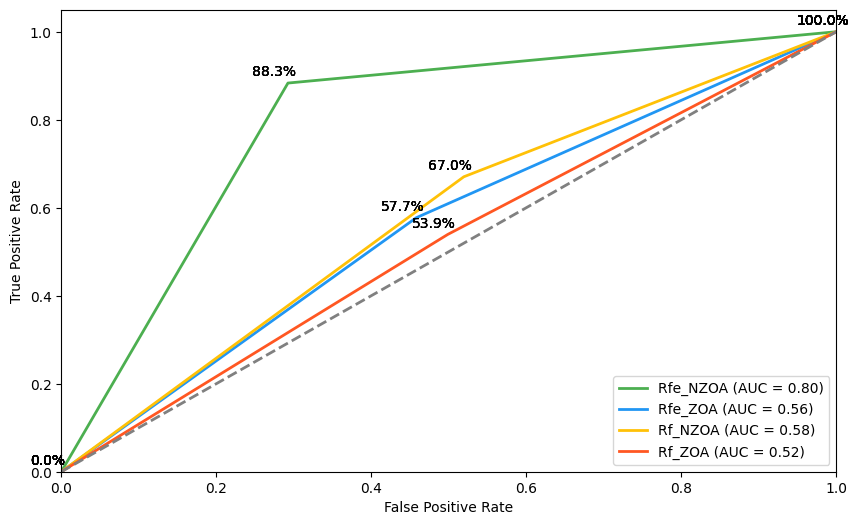

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Assuming you have already trained the models and have the predictions

# Convert target variable to binary form for ROC curve
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']
predictions = [y_pred_rfe_NZOA, y_pred_rfe_ZOA, y_pred_rf_NZOA, y_pred_rf_ZOA]

for i, model in enumerate(models):
    if len(np.unique(y_test)) > 2:  # For multi-class classification
        fpr[model], tpr[model], _ = roc_curve(y_bin[:, i], predictions[i], pos_label=i)
    else:  # For binary classification
        fpr[model], tpr[model], _ = roc_curve(y_bin[:, 0], predictions[i])  # Use y_bin[:, 0] for binary classification
    roc_auc[model] = auc(fpr[model], tpr[model])

# Plotting ROC curves
plt.figure(figsize=(10, 6))

colors = cycle(['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])

for model, color in zip(models, colors):
    plt.plot(fpr[model], tpr[model], color=color, lw=2, label=f'{model} (AUC = {roc_auc[model]:.2f})')

    # Annotate points on the curve with percentage values
    for j, threshold in enumerate(np.linspace(0, 1, 10)):  # Adjust the number of points as needed
        idx = np.argmin(np.abs(fpr[model] - threshold))
        plt.annotate(f'{tpr[model][idx]*100:.1f}%', (fpr[model][idx], tpr[model][idx]), textcoords="offset points", xytext=(-10, 5), ha='center')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
# plt.savefig("roc of models.png")
plt.show()


In [ ]:
# Plotting ROC curves
plt.figure(figsize=(10, 6))

colors = cycle(['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])

for model, color in zip(models, colors):
    plt.plot(fpr[model], tpr[model], color=color, lw=2, label=f'{model} (AUC = {roc_auc[model]:.2f})')

    # Annotate points on the curve with percentage values (rotated vertically)
    for j, threshold in enumerate(np.linspace(0, 1, 10)):  # Adjust the number of points as needed
        idx = np.argmin(np.abs(fpr[model] - threshold))
        plt.annotate(f'{tpr[model][idx]*100:.1f}%', (fpr[model][idx], tpr[model][idx]), textcoords="offset points", xytext=(-10, 5), ha='center', rotation='vertical')  # Add rotation parameter here

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.savefig("roc_of_models v2.png")
plt.show()


In [ ]:
# Plotting ROC curves
plt.figure(figsize=(10, 6))

colors = cycle(['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])

for model, color in zip(models, colors):
    plt.plot(fpr[model], tpr[model], color=color, lw=2, label=f'{model} (AUC = {roc_auc[model]:.2f})')

    # Annotate points on the curve with percentage values (rotated vertically and increased distance)
    for j, threshold in enumerate(np.linspace(0, 1, 10)):  # Adjust the number of points as needed
        idx = np.argmin(np.abs(fpr[model] - threshold))
        plt.annotate(f'{tpr[model][idx]*100:.1f}%', (fpr[model][idx], tpr[model][idx]), textcoords="offset points", xytext=(-10, 15), ha='center', rotation='vertical')  # Adjust xytext parameter for increased distance

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc='lower right')
plt.savefig("roc_of_models.png")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the models and have the predictions

models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']
predictions = [y_pred_rfe_NZOA, y_pred_rfe_ZOA, y_pred_rf_NZOA, y_pred_rf_ZOA]

# Plot confusion matrices separately
for i, model in enumerate(models):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'Confusion Matrix with Title v2 - {model}')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the models and have the predictions

models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']
predictions = [y_pred_rfe_NZOA, y_pred_rfe_ZOA, y_pred_rf_NZOA, y_pred_rf_ZOA]

class_labels = ['Non_Diabetes', 'Diabetes']

# Plot confusion matrices separately
for i, model in enumerate(models):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels,
                annot_kws={"size": 18})  # Set the font size here
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f'Confusion Matrix v2 un - {model}')
    plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already trained the models and have the predictions

models = ['Rfe_NZOA', 'Rfe_ZOA', 'Rf_NZOA', 'Rf_ZOA']
predictions = [y_pred_rfe_NZOA, y_pred_rfe_ZOA, y_pred_rf_NZOA, y_pred_rf_ZOA]

# Plot confusion matrices separately
for i, model in enumerate(models):
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test, predictions[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # Save the figure with a unique filename based on the model name
    plt.savefig(f'confusion_matrix_{model}.png')
    
    plt.show()  # This line is optional and will display the plot if you're running the code interactively


In [ ]:
import shap
modelRF = RandomForestClassifier(random_state=42)
# Set a random seed for reproducibility
np.random.seed(42)
# Initialize the explainer
explainer = shap.TreeExplainer(modelRF)

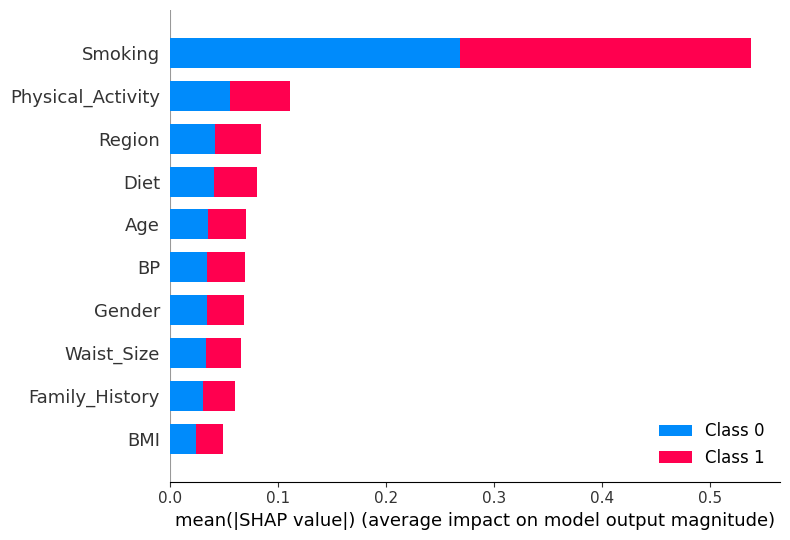

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import shap

# Assuming you have your features (x) and target variable (y)
x = df.iloc[:, :-1]
y = df['Class']

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train a RandomForest model (replace RandomForestClassifier with your actual model)
modelRF = RandomForestClassifier(random_state=42)
modelRF.fit(x_train, y_train)

# Set a random seed for reproducibility
np.random.seed(42)

# Initialize the explainer
explainer = shap.TreeExplainer(modelRF)

# Calculate SHAP values for the entire x_test dataset
shap_values = explainer.shap_values(x_test)

# Visualize the SHAP values using a summary plot
shap.summary_plot(shap_values, x_test, feature_names=x_test.columns)
# Display the plot
plt.show()

# Save the figure
# plt.savefig('shap_summary_plot.png')


In [ ]:
shap.summary_plot(shap_values[0], x_test)
plt.show()
plt.savefig('shap_summary_plot for non diabetes.png')

In [ ]:
shap.summary_plot(shap_values[1], x_test)
plt.show()
plt.savefig('shap_summary_plot for diabetes.png')